In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sidetable # si nos da un error este comando es por no tenerlo instalado
from datetime import date, datetime
from scipy import stats
from sklearn.preprocessing import StandardScaler
pd.options.display.max_columns=None
# establecer el tamaño de nuestras figuras
plt.rcParams["figure.figsize"] = (10,8)

# En el anterior sprint:
1. Exploramos datos
2. Limpiamos datos
3. EDA
4. Comprobamos asunciones

- Nuestra variable respuesta no era normal --> NO cumpliamos asunciones por lo que teníamos que centrarnos en el DT y RF

## Pasamos a estandarizar y codificar  nuestras variables para cada uno de nuestros DF: ocasionales, registrados y totales

### Codificación

In [11]:
df = pd.read_csv('data/bikes_limpio.csv', index_col=0)

Primero comprobamos para cada DF (totales, registrados y ocasionales) si las variables de las columnas a codificar (estación y año) mantenían un orden:

Text(0.5, 1.0, 'Año')

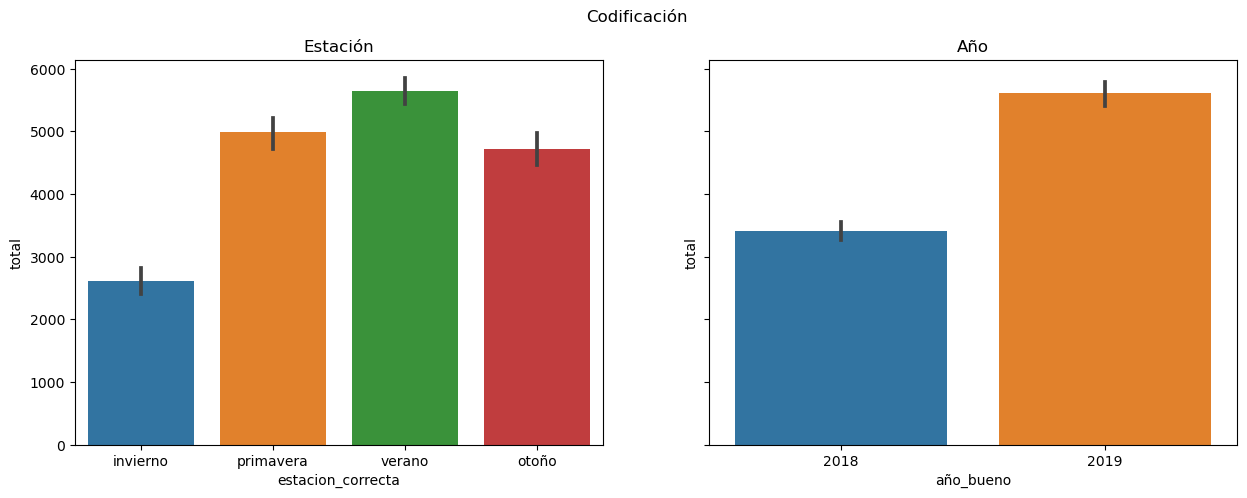

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Codificación')

# Estación
sns.barplot(ax=axes[0], x=df['estacion_correcta'], y=df['total'])
axes[0].set_title('Estación')

# Año
sns.barplot(ax=axes[1],x = df['año_bueno'], y = df['total'])
axes[1].set_title('Año')



Concluimos que tanto los datos de la columna 'año' como 'estación' guardan un orden y codificamos ambas con un map, dándole su peso correspondiente. El df resultante queda así:

In [21]:
df_totales_cod = pd.read_csv('data/totales_encod.csv', index_col=0)
df_totales_cod.sample(3)

,registro,clima,temperatura,sens_termica,humedad,viento,total,fecha_nueva,festividad,festividad_1,mes_bueno,dia_semana_nuevo,no_laboral_nuevo,año_map,estacion_map
199,200,1,31.8,37.4,65.0,8.8,4541,2018-07-19,NaN,0,7,3,1,0,3
607,608,1,31.3,34.5,59.0,11.3,7350,2019-08-31,NaN,0,8,5,0,1,3
546,547,1,33.4,37.5,52.0,11.3,5531,2019-07-01,NaN,0,7,0,1,1,3


### Estandarización

Como tras la limpieza no tenemos outliers, utilizamos el método StandarScaler. 

Estandarizamos nuestras columnas numéricasno codificadas, que son: tempertaura, sens_termica, humedad y viento.

Nuestro DF tras la estandarización y la codificación queda así:

In [28]:
df_estand = pd.read_csv('data/totales_estand_cod.csv', index_col=0)
df_estand.sample(3)

,registro,clima,temperatura,sens_termica,humedad,viento,total,fecha_nueva,festividad,festividad_1,mes_bueno,dia_semana_nuevo,no_laboral_nuevo,año_map,estacion_map
687,688,2,-0.629006,-0.604957,-0.053932,0.672334,5499,2019-11-19,NaN,0,11,1,1,1,2
432,433,2,-0.469052,-0.469879,-1.527684,0.056599,4569,2019-03-09,NaN,0,3,5,0,1,0
626,627,1,0.304058,0.401987,-0.615361,0.399625,7591,2019-09-19,NaN,0,9,3,1,1,3


## Tras la estandarización y la codificación, pasamos al Decision Tree con nuestros múltiples sets de datos:

#### En general, las métricas con el Decision Tree no nos salen muy bien, por ejemplo, con ocasionales quedan así:

In [32]:
df_metricas_ocasionales = pd.read_csv('data/metricas_ocas_dt.csv', index_col=0)
df_metricas_ocasionales 

,MAE,MSE,RMSE,R2,set,modelo
0,317.139869,230474.808632,480.077919,0.520268,test,Decision Tree ocasionales Codif y Estand II
1,304.668110,200968.639037,448.295259,0.570310,train,Decision Tree ocasionales Codif y Estand II
0,364.300333,263183.490717,513.014123,0.452185,test,Decision Tree ocasionales Codif II
1,322.441306,231818.681431,481.475525,0.504350,train,Decision Tree ocasionales Codif II


#### Sin embargo, jugando con los parámetros, hemos conseguido estas métricas con el Random Forest para el DF con las bicis totales:

In [34]:
df_metricas_RF_totales = pd.read_csv('data/metricas_RF_totales.csv', index_col=0)
df_metricas_RF_totales

,MAE,MSE,RMSE,R2,set,modelo
0,472.563510,386403.374438,621.613525,0.887110,test,Random Forest totales encod
1,418.963562,347100.194682,589.152098,0.909033,train,Random Forest totales encod
0,517.633607,463220.033871,680.602699,0.864668,test,Random Forest totales encod - estand
1,546.738638,534835.289735,731.324340,0.859833,train,Random Forest totales encod - estand


Los resultados para los datos sin estandarizar son los que mejor pinta tienen.

## Próximos pasos:

- Realizar predicción
- Preparar  la DEMO